In [2]:
import os
import cv2
import numpy as np

def load_data_from_dir(directory):
    labels_dict = {"normal": 0, "pneumonia": 1}
    data = []
    labels = []
    
    for sub_folder, label in labels_dict.items():
        sub_folder_path = os.path.join(directory, sub_folder)
        for image_file in os.listdir(sub_folder_path):
            image = cv2.imread(os.path.join(sub_folder_path, image_file), cv2.IMREAD_GRAYSCALE)
            data.append(cv2.resize(image, (128, 128)))  # resizing the image to a standard size
            labels.append(label)
    
    return np.array(data), np.array(labels)


---- Train Data ----
Accuracy: 0.8499675955930006
F1 Score: 0.8591849148418491
Precision: 0.8945535148828372
Recall: 0.8265067290813342
Log Loss: 5.339479657365651

---- Test Data ----
Accuracy: 0.8277202072538861
F1 Score: 0.8372093023255814
Precision: 0.8791773778920309
Recall: 0.7990654205607477
Log Loss: 6.1196804022663605

---- Validation Data ----
Accuracy: 0.8521400778210116
F1 Score: 0.8623188405797101
Precision: 0.8902743142144638
Recall: 0.8360655737704918
Log Loss: 5.271710031905669



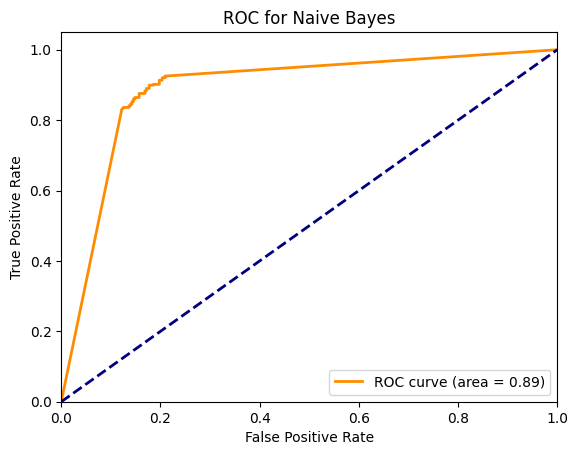

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Load Data
train_images, train_labels = load_data_from_dir("data_to_model/train")
test_images, test_labels = load_data_from_dir("data_to_model/test")
val_images, val_labels = load_data_from_dir("data_to_model/validation")

# Flatten Images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)

# Model
nb_model = GaussianNB()
nb_model.fit(train_images_flat, train_labels)

# Evaluate (Helper Function)
def evaluate_model(model, data, labels, dataset_name):
    pred = model.predict(data)
    pred_prob = model.predict_proba(data)[:, 1]
    
    acc = accuracy_score(labels, pred)
    f1 = f1_score(labels, pred)
    precision = precision_score(labels, pred)
    recall = recall_score(labels, pred)
    loss = log_loss(labels, pred_prob)

    print(f"---- {dataset_name} Data ----")
    print(f"Accuracy: {acc}\nF1 Score: {f1}\nPrecision: {precision}\nRecall: {recall}\nLog Loss: {loss}\n")
    
    return pred_prob, labels

# Performance Metrics
train_pred_prob, _ = evaluate_model(nb_model, train_images_flat, train_labels, "Train")
test_pred_prob, _ = evaluate_model(nb_model, test_images_flat, test_labels, "Test")
val_pred_prob, _ = evaluate_model(nb_model, val_images_flat, val_labels, "Validation")

# Plot ROC Curve (Using Validation Data for Demonstration)
fpr, tpr, _ = roc_curve(val_labels, val_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


---- Train Data ----
Accuracy: 0.8314160725858717
F1 Score: 0.8438039480597462
Precision: 0.8665022352397102
Recall: 0.822264482153306
Log Loss: 5.942785128642276

---- Test Data ----
Accuracy: 0.8147668393782384
F1 Score: 0.8150064683053039
Precision: 0.9130434782608695
Recall: 0.735981308411215
Log Loss: 6.5702371080220505

---- Validation Data ----
Accuracy: 0.8391699092088197
F1 Score: 0.8402061855670103
Precision: 0.9340974212034384
Recall: 0.7634660421545667
Log Loss: 5.611497012204869



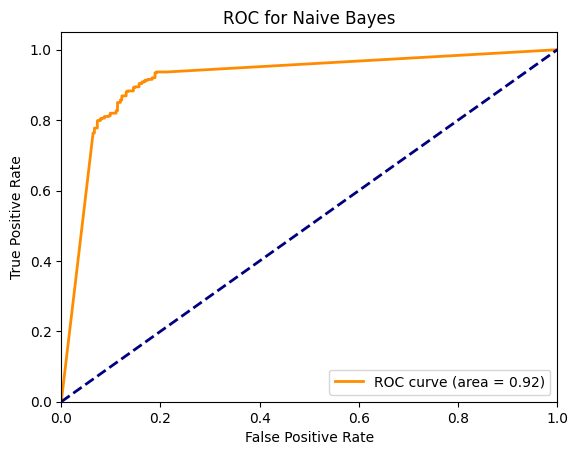

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Load Data
train_images, train_labels = load_data_from_dir("data_to_model_augmented/train")
test_images, test_labels = load_data_from_dir("data_to_model/test")
val_images, val_labels = load_data_from_dir("data_to_model/validation")

# Flatten Images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)

# Model
nb_model = GaussianNB()
nb_model.fit(train_images_flat, train_labels)

# Evaluate (Helper Function)
def evaluate_model(model, data, labels, dataset_name):
    pred = model.predict(data)
    pred_prob = model.predict_proba(data)[:, 1]
    
    acc = accuracy_score(labels, pred)
    f1 = f1_score(labels, pred)
    precision = precision_score(labels, pred)
    recall = recall_score(labels, pred)
    loss = log_loss(labels, pred_prob)

    print(f"---- {dataset_name} Data ----")
    print(f"Accuracy: {acc}\nF1 Score: {f1}\nPrecision: {precision}\nRecall: {recall}\nLog Loss: {loss}\n")
    
    return pred_prob, labels

# Performance Metrics
train_pred_prob, _ = evaluate_model(nb_model, train_images_flat, train_labels, "Train")
test_pred_prob, _ = evaluate_model(nb_model, test_images_flat, test_labels, "Test")
val_pred_prob, _ = evaluate_model(nb_model, val_images_flat, val_labels, "Validation")

# Plot ROC Curve (Using Validation Data for Demonstration)
fpr, tpr, _ = roc_curve(val_labels, val_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Naive Bayes')
plt.legend(loc="lower right")
plt.show()
